# Analyzing Harry Potter: The Philosophers Stone

In this kernel, we are going to analyze the first Harry Potter movie to show several text mining methods. To do this in Python, we are going to use the NLTK (Natural Language Tool-Kit) Library.

In [5]:
# Start with importing all necessary libraries
import nltk
from nltk.corpus import stopwords
import spacy

import matplotlib.pyplot as plt
import pandas as pd

import re
import string


[nltk_data] Downloading package stopwords to /Users/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /Users/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/simon/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

There are many potential goals for a text mining analysis of the dialogues in the first Harry Potter movie. Possible would be for example:

1. Characterization: Use the dialogues to analyze the personalities and characteristics of different characters in the movie. 
You could look at which words are most commonly used by each character, or analyze the sentiment of their dialogues to see if they tend to be more positive or negative.

2. Dialogue similarity: Use the dialogues to compare the similarity between different characters or groups of characters. 
For example, you could use clustering techniques to see if certain characters tend to use similar language or if their dialogues are more distinct from each other.

3. Dialogue evolution: Use the chapter and place IDs to track how the dialogues of different characters evolve over the course of the movie. 
You could look at changes in the words they use or the sentiment of their dialogues to see how they change as the story progresses.

4. Theme identification: Use the dialogues to identify themes or topics that are important to the movie as a whole. 
You could use topic modeling techniques to uncover the most common themes in the dialogues or look for patterns in the words and phrases that are used by different characters.

5. Sentiment analysis: Use the dialogues to perform sentiment analysis and see how the overall mood of the movie changes over time. 
You could also look at the sentiment of individual characters' dialogues to see if they tend to be more positive or negative.

In [49]:
# We are using kaggle's 'Harry Potter Movies Dataset', available at https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset.
# The dialogues are stored in "Dialogue.csv" and using "Chapters.csv" we can see, that the first film consists of chapters 1-34.

df_dialogue = pd.read_csv("../Harry_Potter_Movies/Dialogue.csv", encoding="iso-8859-1")

# Index and "Dialogue ID" are the same, therefore we can remove the redundant column.
df_dialogue = df_dialogue.drop(columns=['Dialogue ID'])
df_dialogue

# Now we can take a look at the Dataframe of film one:
# It consists of the Chapter ID, the Place ID, Character ID and is split into the dialogues.

,Chapter ID,Place ID,Character ID,Dialogue
0,1,8,4,I should have known that you would be here...P...
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,1,8,7,And the boy?
4,1,8,4,Hagrid is bringing him.
...,...,...,...,...
7439,234,71,1,Then Slytherin House will have gained a wonder...
7440,234,71,84,Really?
7441,234,71,1,Really.
7442,234,71,1,Ready?


In [50]:
# Now we extract a list of dialogues from the dataframe to perform text preprocessing steps.

dialogues = df_dialogue["Dialogue"].tolist()
dialogues_tokens = [nltk.word_tokenize(line) for line in dialogues]

# Then we remove stopwords. This works by creating a loop that iterates over each token in a line of dialogue (token for token in line).
# If the lowercase version of that token is not in a list of stopwords (if token.lower() not in stop_words and token not in string.punctuation) 
# we output it into the filtered_tokens list.
# We use the stopwords from NLTK and Python's built-in string method.
stop_words = stopwords.words("english")
filtered_tokens = [[token for token in line if token.lower() not in stop_words and token not in string.punctuation] for line in dialogues_tokens]

# Now we assign the filtered_tokens list back to the dataframe.
df_dialogue = df_dialogue.assign(tokens=filtered_tokens)
df_dialogue

,Chapter ID,Place ID,Character ID,Dialogue,tokens
0,1,8,4,I should have known that you would be here...P...,"[known, would, ..., Professor, McGonagall]"
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[Good, evening, Professor, Dumbledore, rumours..."
2,1,8,4,"I'm afraid so, Professor. The good, and the bad.","['m, afraid, Professor, good, bad]"
3,1,8,7,And the boy?,[boy]
4,1,8,4,Hagrid is bringing him.,"[Hagrid, bringing]"
...,...,...,...,...,...
7439,234,71,1,Then Slytherin House will have gained a wonder...,"[Slytherin, House, gained, wonderful, wizard, ..."
7440,234,71,84,Really?,[Really]
7441,234,71,1,Really.,[Really]
7442,234,71,1,Ready?,[Ready]


In [51]:
# We also need the "Characters.csv" to merge for our analysis. Characters 1-10 are just not as expressive as their names!
df_character = pd.read_csv('../Harry_Potter_Movies/Characters.csv', encoding = 'iso-8859-1')
df_character

# Now we merge the characters onto the dialogues!
df_merger = pd.merge(df_dialogue, df_character, on='Character ID', how='left')
df_dialogue = df_merger.drop(columns=['Species','Wand (Wood)', 'Wand (Core)','Patronus'])
df_dialogue

,Chapter ID,Place ID,Character ID,Dialogue,tokens,Character Name,Gender,House
0,1,8,4,I should have known that you would be here...P...,"[known, would, ..., Professor, McGonagall]",Albus Dumbledore,Male,Gryffindor
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[Good, evening, Professor, Dumbledore, rumours...",Minerva McGonagall,Female,Gryffindor
2,1,8,4,"I'm afraid so, Professor. The good, and the bad.","['m, afraid, Professor, good, bad]",Albus Dumbledore,Male,Gryffindor
3,1,8,7,And the boy?,[boy],Minerva McGonagall,Female,Gryffindor
4,1,8,4,Hagrid is bringing him.,"[Hagrid, bringing]",Albus Dumbledore,Male,Gryffindor
...,...,...,...,...,...,...,...,...
7439,234,71,1,Then Slytherin House will have gained a wonder...,"[Slytherin, House, gained, wonderful, wizard, ...",Harry Potter,Male,Gryffindor
7440,234,71,84,Really?,[Really],Albus Potter,Male,Slytherin
7441,234,71,1,Really.,[Really],Harry Potter,Male,Gryffindor
7442,234,71,1,Ready?,[Ready],Harry Potter,Male,Gryffindor


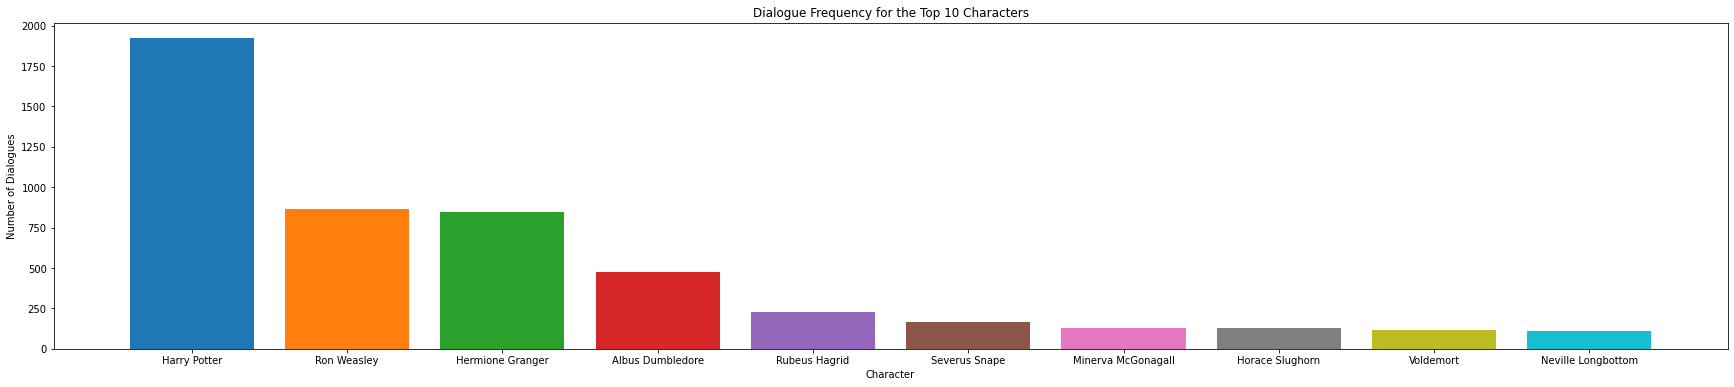

In [52]:
# Now let's look at the ten most talkative characters!

counts = df_dialogue['Character Name'].value_counts()
top_talkative_characters = counts[:10]

plt.figure(figsize=(30, 6))

for character_id, count in top_talkative_characters.items():
    plt.bar(character_id, count)

plt.xlabel("Character")
plt.ylabel("Number of Dialogues")
plt.title("Dialogue Frequency for the Top 10 Characters")
plt.show()

# Not much of a surprise, Harry, Ron and Hermione are the most talkative characters. Interestingly, all Dursley's (Harry's Muggle family) are inside the top ten.

# Dynamik: wer redet mit wem?

# Methoden direkt mit Anwendung am Datensatz zeigen

# Word2Vec schwierig? Vllt streichen

# pro Folie ca. 2 Minuten ;) -> 30 Folien insgesamt

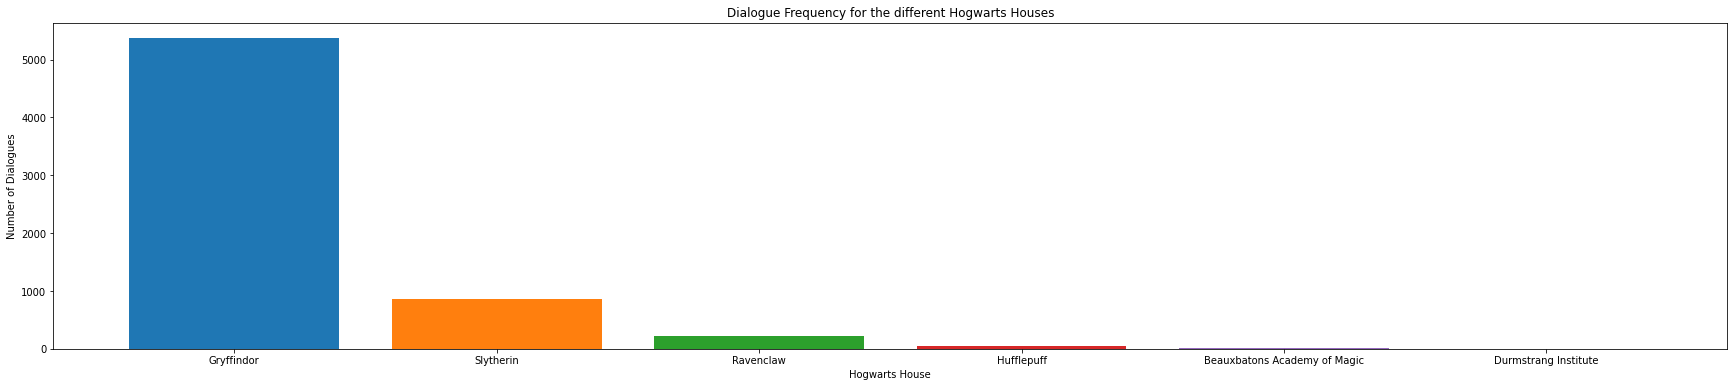

In [53]:
# Count and barplot of dialogue per house...

counts = df_dialogue['House'].value_counts()
top_talkative_houses = counts[:10]

plt.figure(figsize=(30, 6))

for character_id, count in top_talkative_houses.items():
    plt.bar(character_id, count)

plt.xlabel("Hogwarts House")
plt.ylabel("Number of Dialogues")
plt.title("Dialogue Frequency for the different Hogwarts Houses")
plt.show()

# Interestingly, no-one from hufflepuff gets to speak in the first movie.

In [46]:
# Spells

df_spells = pd.read_csv("../Harry_Potter_Movies/Spells.csv")
spells = df_spells['Incantation'].to_list()

# Check whether a row (i.e., a dialogue) contains a spell, and returns the spell as item of a list in the row. Function had to be modified to recognize BOTH one- and two-word spells.
def count_spells_1and2words(row, spells):
    used_spells = []
    for spell in spells:
        if ' ' in spell:
            # Check if the two-word spell appears as a whole
            if spell in ' '.join(row):
                used_spells.append(spell)
        else:
            # Check if the one-word spell appears as a whole or as part of a larger word
            if spell in row:
                used_spells.append(spell)
    return used_spells

# Use count_spells_1and2words and apply it into the column 'spell_count' for each row.
df_dialogue['spell_count'] = df_dialogue['tokens'].apply(count_spells_1and2words, spells=spells)

# make spell_counts a dataframe that consists of the spell as index and the value_count as df entry
spell_counts = df_dialogue['spell_count'].value_counts()
print(spell_counts.head(10))

[]                    7326
[Expelliarmus]          12
[Expecto Patronum]      11
[Lumos]                  9
[Riddikulus]             8
[Accio]                  6
[Alohomora]              5
[Impedimenta]            4
[Confringo]              4
[Stupefy]                4
Name: spell_count, dtype: int64


In [43]:
# Old Def which only recognized two-word spells

def count_spells_2words(row):
    # Split the dialogues into individual words
    words = row['tokens']
    
    # Create a list to store the spells
    spells = []
    
    # Loop through the words and check for combinations of words that are spells
    for i in range(len(words) - 1):
        spell = words[i] + ' ' + words[i+1]
        
        if spell in df_spells['Incantation'].values:
            spells.append(spell)
    
    return spells

# Extract the spell names from the dialogues
df_dialogue['spells'] = df_dialogue.apply(extract_spells, axis=1)

# Count the number of occurrences of each spell
spell_counts = df_dialogue['spells'].value_counts()

# Print the most used spells
print(spell_counts.head())

df_dialogue.to_csv("dialoguewithspells.csv", columns=["Character ID", "spells"])

[]                      7417
[Expecto Patronum]        10
[Avada Kedavra]            4
[Wingardium Leviosa]       3
[Petrificus Totalus]       3
Name: spells, dtype: int64


In [55]:
# Part of Speech tagging

def pos_tag_text(row):
    # import tokens
    tokens = row["tokens"]

    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    return pos_tags

# Apply the pos_tag_text() function to the dialogue column
df_dialogue['pos_tags'] = df_dialogue.apply(pos_tag_text, axis=1)

In [61]:
def get_chunks(row):
    # Get the pos_tags
    pos_tags = row['pos_tags']

    # Get chunks
    chunked = nltk.ne_chunk(pos_tags)

    return chunked
    
df_dialogue['chunks'] = df_dialogue.apply(get_chunks, axis=1)

In [64]:
def extract_entities(row):
    
    # Extract named entities
    chunked = row['chunks']
    
    # Extract all named entities
    entities = []
    for entity in chunked:
        if hasattr(entity, 'label'):
            entities.append(entity)
    
    return entities

df_dialogue['all_entities_nltk'] = df_dialogue.apply(extract_entities, axis=1)

In [65]:
df_dialogue

,Chapter ID,Place ID,Character ID,Dialogue,tokens,Character Name,Gender,House,pos_tags,entities_people,all_entities_nltk,all_entities_spacy,chunks
0,1,8,4,I should have known that you would be here...P...,"[known, would, ..., Professor, McGonagall]",Albus Dumbledore,Male,Gryffindor,"[(known, VBN), (would, MD), (..., :), (Profess...",[],[],[(McGonagall)],"[(known, VBN), (would, MD), (..., :), (Profess..."
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[Good, evening, Professor, Dumbledore, rumours...",Minerva McGonagall,Female,Gryffindor,"[(Good, JJ), (evening, NN), (Professor, NNP), ...","[[(Albus, NNP)]]","[[(Good, JJ)], [(Albus, NNP)]]","[(evening), (Dumbledore), (Albus)]","[[(Good, JJ)], (evening, NN), (Professor, NNP)..."
2,1,8,4,"I'm afraid so, Professor. The good, and the bad.","['m, afraid, Professor, good, bad]",Albus Dumbledore,Male,Gryffindor,"[('m, VBP), (afraid, JJ), (Professor, NNP), (g...",[],[],[],"[('m, VBP), (afraid, JJ), (Professor, NNP), (g..."
3,1,8,7,And the boy?,[boy],Minerva McGonagall,Female,Gryffindor,"[(boy, NN)]",[],[],[],"[(boy, NN)]"
4,1,8,4,Hagrid is bringing him.,"[Hagrid, bringing]",Albus Dumbledore,Male,Gryffindor,"[(Hagrid, NNP), (bringing, NN)]",[],"[[(Hagrid, NNP)]]",[(Hagrid)],"[[(Hagrid, NNP)], (bringing, NN)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,234,71,1,Then Slytherin House will have gained a wonder...,"[Slytherin, House, gained, wonderful, wizard, ...",Harry Potter,Male,Gryffindor,"[(Slytherin, NNP), (House, NNP), (gained, VBD)...","[[(Slytherin, NNP)]]","[[(Slytherin, NNP)], [(House, NNP)], [(Gryffin...","[(Slytherin, House), (Gryffindor)]","[[(Slytherin, NNP)], [(House, NNP)], (gained, ..."
7440,234,71,84,Really?,[Really],Albus Potter,Male,Slytherin,"[(Really, RB)]",[],[],[],"[(Really, RB)]"
7441,234,71,1,Really.,[Really],Harry Potter,Male,Gryffindor,"[(Really, RB)]",[],[],[],"[(Really, RB)]"
7442,234,71,1,Ready?,[Ready],Harry Potter,Male,Gryffindor,"[(Ready, JJ)]",[],"[[(Ready, JJ)]]",[],"[[(Ready, JJ)]]"


In [59]:
# Load the English model
# spacy model must be installed first with 'python -m spacy download en_core_web_sm' in the terminal
nlp = spacy.load('en_core_web_sm')
def extract_entities(row):
    # Process the text
    doc = nlp(row['Dialogue'])
    
    # Extract named entities
    entities = [entity for entity in doc.ents]
    
    return entities


df_dialogue['all_entities_spacy'] = df_dialogue.apply(extract_entities, axis=1)

In [63]:
df_dialogue.to_csv('NER.csv')

Sentiment polarity is a measure of the positivity or negativity of a piece of text, with a value between -1 and 1. A polarity value of -1 indicates a very negative sentiment, a value of 0 indicates a neutral sentiment, and a value of 1 indicates a very positive sentiment.

Sentiment subjectivity is a measure of the subjectivity or objectivity of a piece of text, with a value between 0 and 1. A subjectivity value of 0 indicates a completely objective text, while a value of 1 indicates a completely subjective text. Texts that are more subjective tend to express personal opinions, feelings, or judgments, while texts that are more objective tend to be factual and based on observable events.

In [72]:
from textblob import TextBlob

def get_sentiment(row):
    # Join the tokens back into a single string
    dialogue = ' '.join(row['tokens'])
    
    # Create a TextBlob object from the dialogue
    blob = TextBlob(dialogue)
    
    # Get the sentiment of the dialogue
    sentiment = blob.sentiment
    
    # Return the polarity and subjectivity of the dialogue
    return (sentiment.polarity, sentiment.subjectivity)

# Add a new column to the data frame to store the sentiment of the dialogue
df_dialogue['sentiment'] = df_dialogue.apply(get_sentiment, axis=1)

In [73]:
df_dialogue

,Chapter ID,Place ID,Character ID,Dialogue,tokens,Character Name,Gender,House,pos_tags,entities_people,all_entities_nltk,all_entities_spacy,chunks,sentiment
0,1,8,4,I should have known that you would be here...P...,"[known, would, ..., Professor, McGonagall]",Albus Dumbledore,Male,Gryffindor,"[(known, VBN), (would, MD), (..., :), (Profess...",[],[],[(McGonagall)],"[(known, VBN), (would, MD), (..., :), (Profess...","(0.0, 0.0)"
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[Good, evening, Professor, Dumbledore, rumours...",Minerva McGonagall,Female,Gryffindor,"[(Good, JJ), (evening, NN), (Professor, NNP), ...","[[(Albus, NNP)]]","[[(Good, JJ)], [(Albus, NNP)]]","[(evening), (Dumbledore), (Albus)]","[[(Good, JJ)], (evening, NN), (Professor, NNP)...","(0.5249999999999999, 0.625)"
2,1,8,4,"I'm afraid so, Professor. The good, and the bad.","['m, afraid, Professor, good, bad]",Albus Dumbledore,Male,Gryffindor,"[('m, VBP), (afraid, JJ), (Professor, NNP), (g...",[],[],[],"[('m, VBP), (afraid, JJ), (Professor, NNP), (g...","(-0.19999999999999996, 0.7222222222222222)"
3,1,8,7,And the boy?,[boy],Minerva McGonagall,Female,Gryffindor,"[(boy, NN)]",[],[],[],"[(boy, NN)]","(0.0, 0.0)"
4,1,8,4,Hagrid is bringing him.,"[Hagrid, bringing]",Albus Dumbledore,Male,Gryffindor,"[(Hagrid, NNP), (bringing, NN)]",[],"[[(Hagrid, NNP)]]",[(Hagrid)],"[[(Hagrid, NNP)], (bringing, NN)]","(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,234,71,1,Then Slytherin House will have gained a wonder...,"[Slytherin, House, gained, wonderful, wizard, ...",Harry Potter,Male,Gryffindor,"[(Slytherin, NNP), (House, NNP), (gained, VBD)...","[[(Slytherin, NNP)]]","[[(Slytherin, NNP)], [(House, NNP)], [(Gryffin...","[(Slytherin, House), (Gryffindor)]","[[(Slytherin, NNP)], [(House, NNP)], (gained, ...","(0.6, 0.6)"
7440,234,71,84,Really?,[Really],Albus Potter,Male,Slytherin,"[(Really, RB)]",[],[],[],"[(Really, RB)]","(0.2, 0.2)"
7441,234,71,1,Really.,[Really],Harry Potter,Male,Gryffindor,"[(Really, RB)]",[],[],[],"[(Really, RB)]","(0.2, 0.2)"
7442,234,71,1,Ready?,[Ready],Harry Potter,Male,Gryffindor,"[(Ready, JJ)]",[],"[[(Ready, JJ)]]",[],"[[(Ready, JJ)]]","(0.2, 0.5)"
